<a href="https://colab.research.google.com/github/mraniketr/DeepLearningProjects/blob/master/Auto_Encoder_Gaussian_noise_removal_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import GaussianNoise
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

In [0]:
def preprocess(x):
    x = x.astype('float32') / 255.
    return x.reshape(-1, np.prod(x.shape[1:])) # flatten

X_train = preprocess(X_train)
X_test  = preprocess(X_test)

X_train, X_valid = train_test_split(X_train, test_size=500)

In [0]:
def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = UpSampling2D()(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    x = Conv2D(16, 3, activation='relu')(x) 
    x = UpSampling2D()(x)
    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)    
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [6]:
autoencoder = make_convolutional_autoencoder()

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
def add_noise(image):
      row =  28
      col = 28
      ch = 1
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
    
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy  = add_noise(X_test)

In [9]:

autoencoder = make_convolutional_autoencoder()
autoencoder.fit(X_train_noisy, X_train, epochs=5, batch_size=128, validation_data=(X_valid_noisy, X_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/5
59500/59500 [==============================] - 75s 1ms/step - loss: 0.2193 - val_loss: 0.1910
Epoch 2/5
59500/59500 [==============================] - 77s 1ms/step - loss: 0.1460 - val_loss: 0.1789
Epoch 3/5
59500/59500 [==============================] - 76s 1ms/step - loss: 0.1303 - val_loss: 0.1732
Epoch 4/5
59500/59500 [==============================] - 77s 1ms/step - loss: 0.1225 - val_loss: 0.1740
Epoch 5/5
59500/59500 [==============================] - 78s 1ms/step - loss: 0.1178 - val_loss: 0.1733


In [0]:
def show_images(before_images, after_images):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        # before
        plt.subplot(2, 10, i+1)
        plt.imshow(before_images[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        # after
        plt.subplot(2, 10, 10+i+1)
        plt.imshow(after_images[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

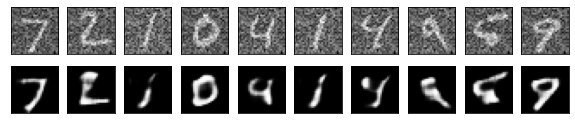

In [11]:
X_test_decoded = autoencoder.predict(X_test_noisy)

show_images(X_test_noisy, X_test_decoded)